In [6]:

import pandas as pd


from google.colab import drive
drive.mount("/content/drive")

!ls drive/MyDrive/Ramanspec.csv

data = pd.read_csv('drive/MyDrive/Ramanspec.csv')

print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/Ramanspec.csv
          id  392.0cm-1  393.5cm-1  394.8cm-1  396.2cm-1  397.5cm-1  \
0          0   0.252686   0.591797   0.500488   0.335205   0.354492   
1          1   0.313477   0.404541   0.434082   0.537598   0.467773   
2          2   0.357666   0.383057   0.283936   0.356201   0.272461   
3          3   0.294922   0.160889   0.185425   0.193115   0.170288   
4          4   0.517090   0.337891   0.508789   0.395508   0.500977   
...      ...        ...        ...        ...        ...        ...   
46495  46495   0.314697   0.270508   0.275391   0.223022   0.252441   
46496  46496   0.390137   0.355713   0.321045   0.226318   0.206787   
46497  46497   0.296631   0.331543   0.309326   0.250732   0.348145   
46498  46498   0.389404   0.332031   0.450928   0.270264   0.354004   
46499  46499   0.343018   0.418213   0.483643   0.401855   0.3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


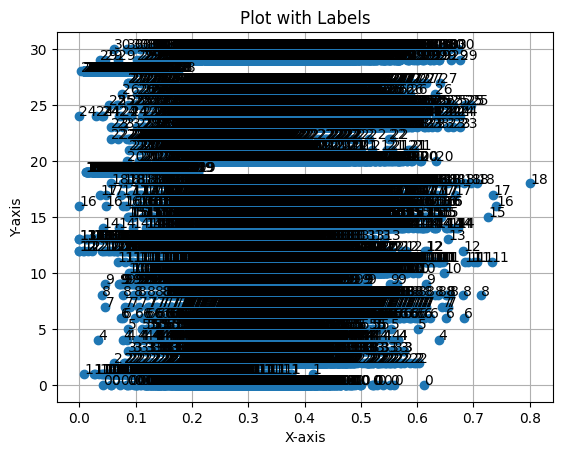

In [5]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

# Change this path to point to the actual location of your CSV file
csv_path = "/content/drive/MyDrive/Ramanspec.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_path)

# Extract columns from the DataFrame
x = data['392.0cm-1']
y = data['label']
labels = data['label']

# Plot the data
plt.plot(x, y, marker='o', linestyle='')

# Add labels to the points
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]))

# Add labels to the axes and the title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Labels')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
X=data.drop('label', axis=1).values
y=data['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=26, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))


class MLP(nn.Module):
    def __init__(self, input_size, output_size):
      super(MLP, self).__init__()
      self.fc1 = nn.Linear(input_size, 512)
      self.fc2 = nn.Linear(512,256)
      self.fc3 = nn.Linear(256,128)
      self.fc4 = nn.Linear(128,output_size)

    def forward(self, x):
      x = torch.relu(self.fc1(x))
      x = torch.relu(self.fc2(x))
      x = torch.relu(self.fc3(x))
      x = self.fc4(x)
      return x


model = MLP(input_size=X_train.shape[1], output_size=len(np.unique(y_train)))


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)

for epoch in range(10):
  model.train()
  for xb, yb in train_dataloader:
    correct_cnt = 0
    train_cnt = 0
    losses = []
    optimizer.zero_grad()
    logits = model(xb)
    y_pred = torch.argmax(logits, dim=1)
    correct = y_pred == yb
    correct_cnt += correct.sum().item()
    train_cnt += correct.size(0)
    loss = criterion(logits, yb)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()


    model.eval()
    with torch.no_grad():
      test_losses = []
      test_cnt = 0
      tesr_correct_cnt = 0
      for xt, yt in test_dataloader:
        test_logits = model(xt)
        test_loss = criterion(test_logits, yt)
        test_pred = torch.argmax(test_logits, dim=1)
        correct = test_pred == yt
        tesr_correct_cnt += correct.sum().item()
        test_cnt += correct.size(0)
        test_losses.append(test_loss.item())

      print("Epoch {0:d}: train loss {1:f} test loss {2:f}".format(epoch, np.mean(losses), np.mean(test_losses)))
      print("Epoch {0:d}: train acc {1:f} test acc {2:f}".format(epoch, correct_cnt/train_cnt, tesr_correct_cnt/test_cnt))



Epoch 0: train loss 46.178383 test loss 48.740959
Epoch 0: train acc 0.076923 test acc 0.031290
Epoch 0: train loss 48.337410 test loss 45.897984
Epoch 0: train acc 0.000000 test acc 0.032473
Epoch 0: train loss 40.512016 test loss 40.692253
Epoch 0: train acc 0.000000 test acc 0.031720
Epoch 0: train loss 46.112625 test loss 35.695919
Epoch 0: train acc 0.038462 test acc 0.033333
Epoch 0: train loss 29.610138 test loss 29.936270
Epoch 0: train acc 0.000000 test acc 0.030753
Epoch 0: train loss 30.211439 test loss 26.279312
Epoch 0: train acc 0.000000 test acc 0.032581
Epoch 0: train loss 27.358189 test loss 22.998598
Epoch 0: train acc 0.000000 test acc 0.032258
Epoch 0: train loss 21.819496 test loss 19.871119
Epoch 0: train acc 0.038462 test acc 0.032688
Epoch 0: train loss 20.969063 test loss 20.500727
Epoch 0: train acc 0.038462 test acc 0.032473
Epoch 0: train loss 26.970772 test loss 19.815647
Epoch 0: train acc 0.038462 test acc 0.029570
Epoch 0: train loss 16.804741 test loss 

KeyboardInterrupt: 

In [5]:
!pip install gdown
!pip install openpyxl
!pip install torch
# Neural Network Model

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load CSV data from Google Drive
file_path = '/content/drive/My Drive/Ramanspec.csv'
df = pd.read_csv(file_path)

# Assume the CSV file has a 'target' column and features
# Adjust this based on your dataset
X = df.drop('label', axis=1).values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).view(-1, 1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
batch_size = 32

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')



# Linear Regression Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive


# Load CSV data from Google Drive
file_path = '/content/drive/My Drive/Ramanspec.csv'
df = pd.read_csv(file_path)

# Assume the CSV file has a 'target' column and features
# Adjust this based on your dataset
X = df.drop('label', axis=1).values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but can be beneficial for linear regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/10], Loss: 24.3670
Epoch [2/10], Loss: 11.8204
Epoch [3/10], Loss: 9.2096
Epoch [4/10], Loss: 6.7472
Epoch [5/10], Loss: 5.2288
Epoch [6/10], Loss: 4.4195
Epoch [7/10], Loss: 3.3215
Epoch [8/10], Loss: 2.8524
Epoch [9/10], Loss: 2.6055
Epoch [10/10], Loss: 2.2503
Test Loss: 13.1153
Mean Squared Error: 32.8870
R^2 Score: 0.5884


In [4]:

# Comparison Model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, X_test, y_train, y_test are your training and testing data
# Preprocess your data as needed before this step

# Convert data to PyTorch tensors

X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).view(-1, 1)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the models
input_size = X_train.shape[1]

linear_model = LinearRegression()
neural_net_model = SimpleNN(input_size)

# Train the linear regression model
linear_model.fit(X_train, y_train)

# Train the neural network model
criterion = nn.MSELoss()
optimizer = optim.Adam(neural_net_model.parameters(), lr=0.001)

epochs = 10
batch_size = 32

for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = neural_net_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate linear regression model
linear_pred_train = linear_model.predict(X_train)
linear_pred_test = linear_model.predict(X_test)

linear_mse_train = mean_squared_error(y_train, linear_pred_train)
linear_mse_test = mean_squared_error(y_test, linear_pred_test)
linear_r2_train = r2_score(y_train, linear_pred_train)
linear_r2_test = r2_score(y_test, linear_pred_test)

print("Linear Regression Results:")
print(f"Train MSE: {linear_mse_train:.4f}, Test MSE: {linear_mse_test:.4f}")
print(f"Train R^2: {linear_r2_train:.4f}, Test R^2: {linear_r2_test:.4f}")

# Evaluate neural network model
neural_net_model.eval()
with torch.no_grad():
    neural_net_pred_train = neural_net_model(X_train_tensor).numpy()
    neural_net_pred_test = neural_net_model(X_test_tensor).numpy()

neural_net_mse_train = mean_squared_error(y_train, neural_net_pred_train)
neural_net_mse_test = mean_squared_error(y_test, neural_net_pred_test)
neural_net_r2_train = r2_score(y_train, neural_net_pred_train)
neural_net_r2_test = r2_score(y_test, neural_net_pred_test)

print("\nNeural Network Results:")
print(f"Train MSE: {neural_net_mse_train:.4f}, Test MSE: {neural_net_mse_test:.4f}")
print(f"Train R^2: {neural_net_r2_train:.4f}, Test R^2: {neural_net_r2_test:.4f}")


# Linear Regression 2nd Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from google.colab import drive

# Load CSV data from Google Drive
file_path = '/content/drive/My Drive/Ramanspec.csv'
df = pd.read_csv(file_path)

# Assume the CSV file has a 'target' column and features
# Adjust this based on your dataset
X = df.drop('label', axis=1)
y = df['label']

# Feature engineering: Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Ridge Regression model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

NameError: name 'X_train' is not defined

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Assuming you have defined and compiled your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a History callback to record the training history
history = History()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[history])

# Plot the learning curve
plot_learning_curve(history)


def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming you have a variable `history` containing the training history of your neural network
# Replace `history` with the actual variable name you are using
plot_learning_curve(history)


NameError: name 'X_train' is not defined